In [ ]:
#Jasurbek Usmonaliev 2255209
#14.04.2024



!pip install pyspark

In [2]:
# Create a PySpark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()


In [44]:
#uploading data
df = spark.read.csv('/content/cleaned_data.csv', header=True)

In [4]:
#getting first 10 rows
df.take(10)

[Row(_c0='1', Gender='1', Age='24', Height='170', Weight='81', family_history_with_overweight='1', FCHighCal='1', FCvegetables='2', NumMainMeals='3', ConsFoodBetwMeal='4', SMOKE='0', DayWater='2.8', MonitorCalory='0', PhysicalActFreq='0', TechUsePerDay='1', Alcohol='3', MTRANS='4', ObesityLevel='3'),
 Row(_c0='2', Gender='0', Age='18', Height='156', Weight='57', family_history_with_overweight='1', FCHighCal='1', FCvegetables='2', NumMainMeals='3', ConsFoodBetwMeal='2', SMOKE='0', DayWater='2', MonitorCalory='0', PhysicalActFreq='1', TechUsePerDay='1', Alcohol='2', MTRANS='1', ObesityLevel='1'),
 Row(_c0='3', Gender='0', Age='18', Height='171', Weight='50', family_history_with_overweight='1', FCHighCal='1', FCvegetables='1.9', NumMainMeals='1.4', ConsFoodBetwMeal='4', SMOKE='0', DayWater='1.9', MonitorCalory='0', PhysicalActFreq='0.9', TechUsePerDay='1.7', Alcohol='2', MTRANS='4', ObesityLevel='0'),
 Row(_c0='4', Gender='0', Age='20', Height='171', Weight='131', family_history_with_over

In [5]:
#Count number of rows
df.count()

20758

In [6]:
#Getting first 20 rows
df.take(20)

[Row(_c0='1', Gender='1', Age='24', Height='170', Weight='81', family_history_with_overweight='1', FCHighCal='1', FCvegetables='2', NumMainMeals='3', ConsFoodBetwMeal='4', SMOKE='0', DayWater='2.8', MonitorCalory='0', PhysicalActFreq='0', TechUsePerDay='1', Alcohol='3', MTRANS='4', ObesityLevel='3'),
 Row(_c0='2', Gender='0', Age='18', Height='156', Weight='57', family_history_with_overweight='1', FCHighCal='1', FCvegetables='2', NumMainMeals='3', ConsFoodBetwMeal='2', SMOKE='0', DayWater='2', MonitorCalory='0', PhysicalActFreq='1', TechUsePerDay='1', Alcohol='2', MTRANS='1', ObesityLevel='1'),
 Row(_c0='3', Gender='0', Age='18', Height='171', Weight='50', family_history_with_overweight='1', FCHighCal='1', FCvegetables='1.9', NumMainMeals='1.4', ConsFoodBetwMeal='4', SMOKE='0', DayWater='1.9', MonitorCalory='0', PhysicalActFreq='0.9', TechUsePerDay='1.7', Alcohol='2', MTRANS='4', ObesityLevel='0'),
 Row(_c0='4', Gender='0', Age='20', Height='171', Weight='131', family_history_with_over

In [7]:
#For more understanding, I used show() function, it shows first 20 rows
df.show()

+---+------+---+------+------+------------------------------+---------+------------+------------+----------------+-----+--------+-------------+---------------+-------------+-------+------+------------+
|_c0|Gender|Age|Height|Weight|family_history_with_overweight|FCHighCal|FCvegetables|NumMainMeals|ConsFoodBetwMeal|SMOKE|DayWater|MonitorCalory|PhysicalActFreq|TechUsePerDay|Alcohol|MTRANS|ObesityLevel|
+---+------+---+------+------+------------------------------+---------+------------+------------+----------------+-----+--------+-------------+---------------+-------------+-------+------+------------+
|  1|     1| 24|   170|    81|                             1|        1|           2|           3|               4|    0|     2.8|            0|              0|            1|      3|     4|           3|
|  2|     0| 18|   156|    57|                             1|        1|           2|           3|               2|    0|       2|            0|              1|            1|      2|     1|    

In [8]:
#For more visibility of the data, I converted output to pandas DataFrame
#importing pandas
import pandas as pd
pd.DataFrame(df.take(5), columns = df.columns)

,_c0,Gender,Age,Height,Weight,family_history_with_overweight,FCHighCal,FCvegetables,NumMainMeals,ConsFoodBetwMeal,SMOKE,DayWater,MonitorCalory,PhysicalActFreq,TechUsePerDay,Alcohol,MTRANS,ObesityLevel
0,1,1,24,170,81,1,1,2,3,4,0,2.8,0,0,1,3,4,3
1,2,0,18,156,57,1,1,2,3,2,0,2,0,1,1,2,1,1
2,3,0,18,171,50,1,1,1.9,1.4,4,0,1.9,0,0.9,1.7,2,4,0
3,4,0,20,171,131,1,1,3,3,4,0,1.7,0,1.5,0.8,3,4,6
4,5,1,31,191,93,1,1,2.7,2,4,0,2,0,2,0.9,3,4,3


In [45]:
#Changing column name to new name
df = df.withColumnRenamed("_c0", "id")



In [10]:
#Rechecking
df.show(10)


+---+------+---+------+------+------------------------------+---------+------------+------------+----------------+-----+--------+-------------+---------------+-------------+-------+------+------------+
| id|Gender|Age|Height|Weight|family_history_with_overweight|FCHighCal|FCvegetables|NumMainMeals|ConsFoodBetwMeal|SMOKE|DayWater|MonitorCalory|PhysicalActFreq|TechUsePerDay|Alcohol|MTRANS|ObesityLevel|
+---+------+---+------+------+------------------------------+---------+------------+------------+----------------+-----+--------+-------------+---------------+-------------+-------+------+------------+
|  1|     1| 24|   170|    81|                             1|        1|           2|           3|               4|    0|     2.8|            0|              0|            1|      3|     4|           3|
|  2|     0| 18|   156|    57|                             1|        1|           2|           3|               2|    0|       2|            0|              1|            1|      2|     1|    

In [11]:
#Structure of the data
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Height: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- family_history_with_overweight: string (nullable = true)
 |-- FCHighCal: string (nullable = true)
 |-- FCvegetables: string (nullable = true)
 |-- NumMainMeals: string (nullable = true)
 |-- ConsFoodBetwMeal: string (nullable = true)
 |-- SMOKE: string (nullable = true)
 |-- DayWater: string (nullable = true)
 |-- MonitorCalory: string (nullable = true)
 |-- PhysicalActFreq: string (nullable = true)
 |-- TechUsePerDay: string (nullable = true)
 |-- Alcohol: string (nullable = true)
 |-- MTRANS: string (nullable = true)
 |-- ObesityLevel: string (nullable = true)



In [12]:
#Summary statistics of the data
df.describe().show()

+-------+-----------------+------------------+-----------------+------------------+------------------+------------------------------+-------------------+------------------+------------------+------------------+--------------------+------------------+--------------------+------------------+------------------+------------------+------------------+-----------------+
|summary|               id|            Gender|              Age|            Height|            Weight|family_history_with_overweight|          FCHighCal|      FCvegetables|      NumMainMeals|  ConsFoodBetwMeal|               SMOKE|          DayWater|       MonitorCalory|   PhysicalActFreq|     TechUsePerDay|           Alcohol|            MTRANS|     ObesityLevel|
+-------+-----------------+------------------+-----------------+------------------+------------------+------------------------------+-------------------+------------------+------------------+------------------+--------------------+------------------+------------------

In [46]:
#Checking for null values
from pyspark.sql.functions import count, when, isnan, col

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+---+------+------+------------------------------+---------+------------+------------+----------------+-----+--------+-------------+---------------+-------------+-------+------+------------+
| id|Gender|Age|Height|Weight|family_history_with_overweight|FCHighCal|FCvegetables|NumMainMeals|ConsFoodBetwMeal|SMOKE|DayWater|MonitorCalory|PhysicalActFreq|TechUsePerDay|Alcohol|MTRANS|ObesityLevel|
+---+------+---+------+------+------------------------------+---------+------------+------------+----------------+-----+--------+-------------+---------------+-------------+-------+------+------------+
|  0|     0|  0|     0|     0|                             0|        0|           0|           0|               0|    0|       0|            0|              0|            0|      0|     0|           0|
+---+------+---+------+------+------------------------------+---------+------------+------------+----------------+-----+--------+-------------+---------------+-------------+-------+------+----

In [47]:
#Grouping be target variable levels
df.groupby('ObesityLevel').count().show()

+------------+-----+
|ObesityLevel|count|
+------------+-----+
|           3| 2522|
|           0| 2523|
|           5| 3248|
|           6| 4046|
|           1| 3082|
|           4| 2910|
|           2| 2427|
+------------+-----+



In [15]:
#Importing matplotlib.pylot
import matplotlib.pyplot as plt

In [48]:
# Converting all string columns to float type
for col_name, col_type in df.dtypes:
    if col_type == 'string':
        df = df.withColumn(col_name, col(col_name).cast('float'))


In [49]:
df_pd = df.toPandas()

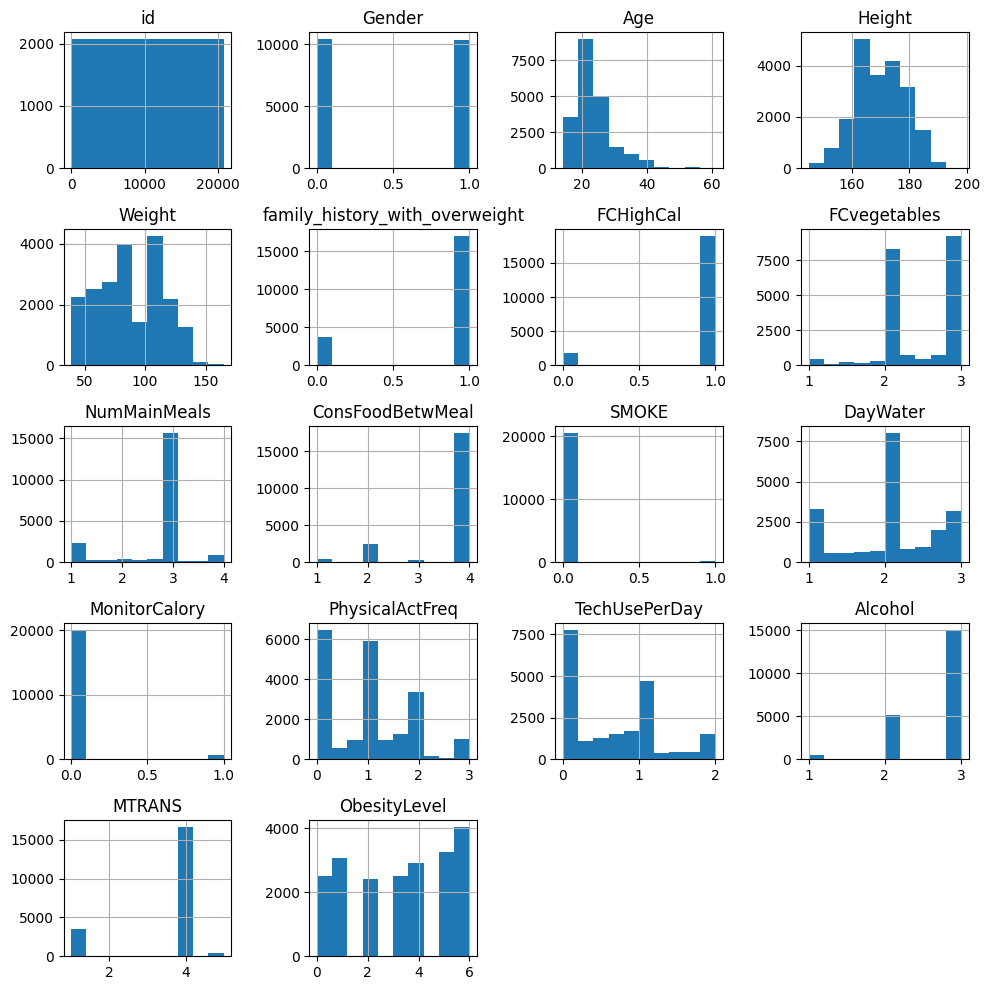

In [18]:
#HISTOGRAMS
df_pd.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

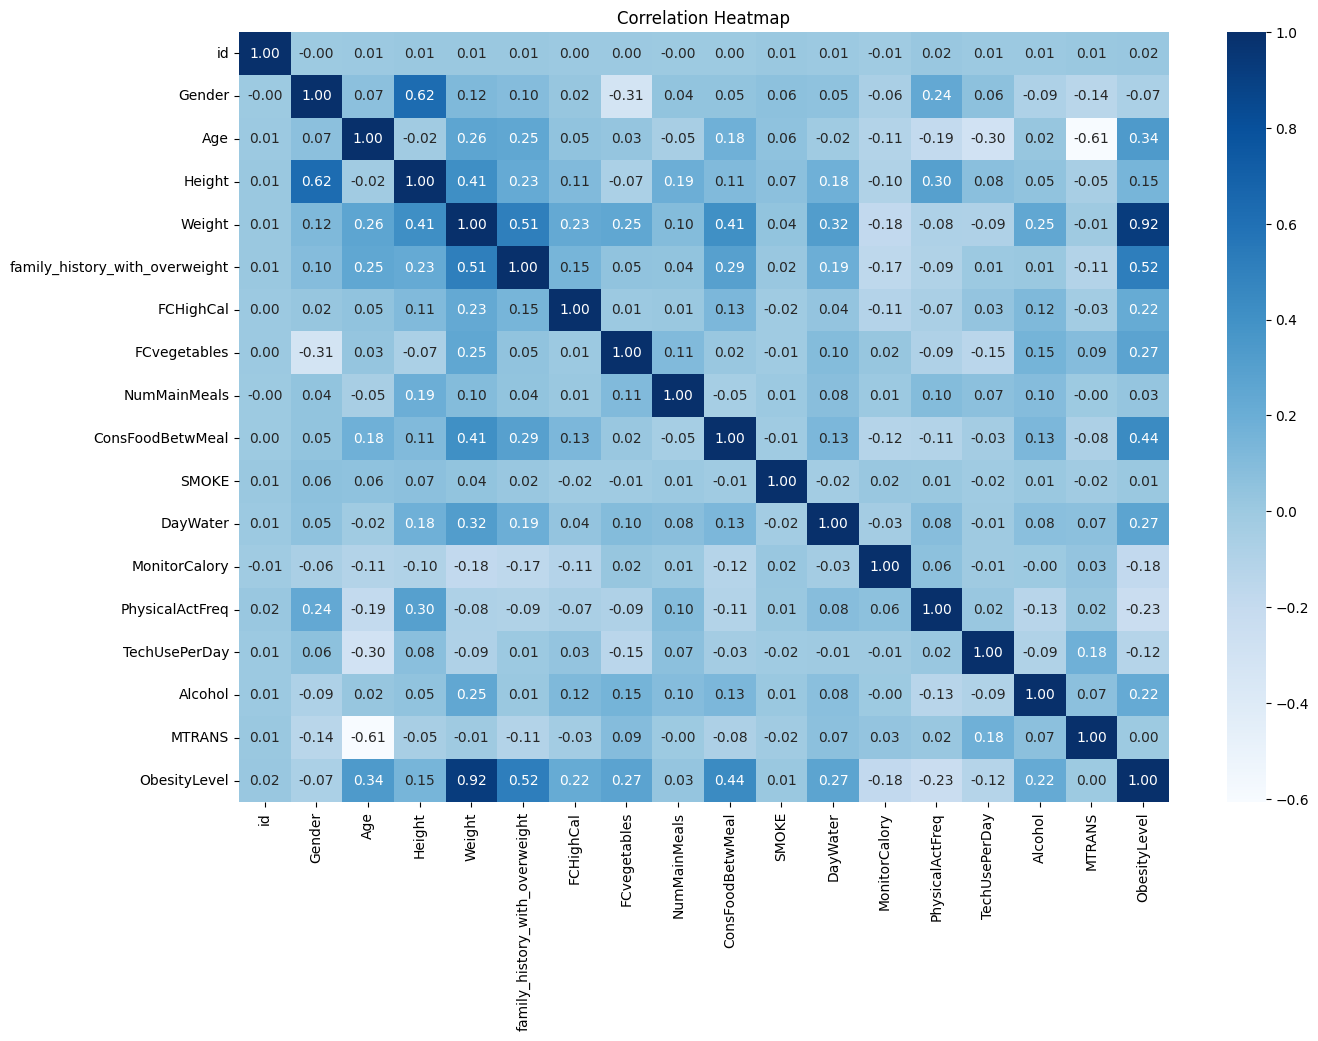

In [19]:
#pandas and maplotlib already imported no need to import them

#import seaborn
import seaborn as sns

# Calculation of the correlation matrix
correlation_matrix = df_pd.corr()

# Creating the HEATMAP
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [50]:
df = df.withColumn("ObesityLevel", col("ObesityLevel").cast("float"))

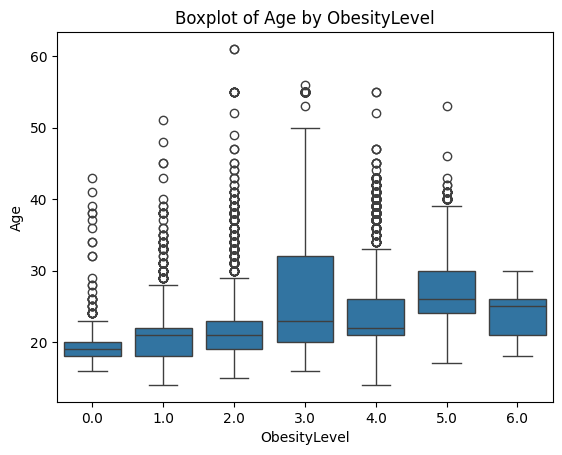

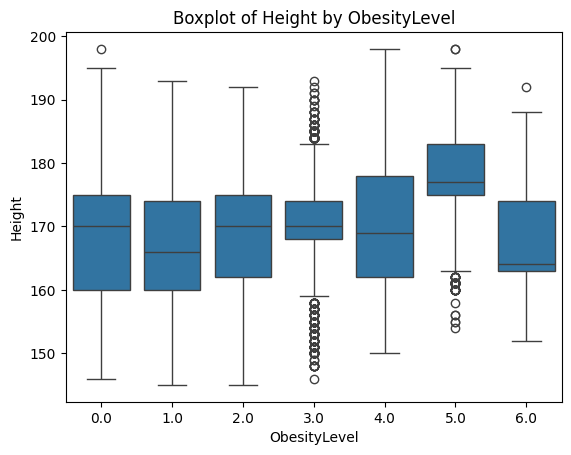

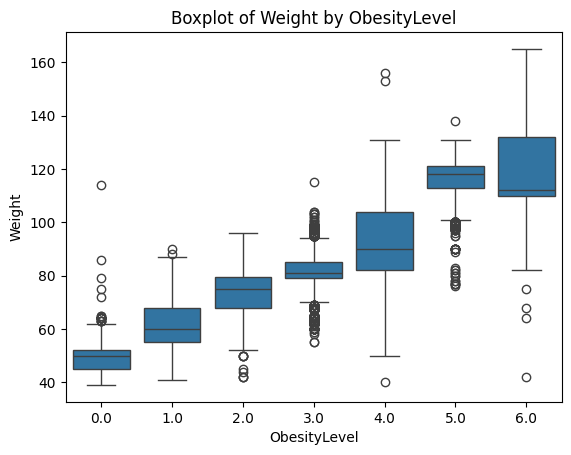

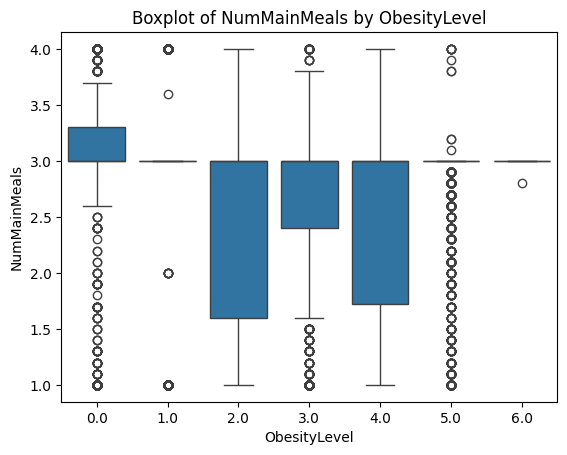

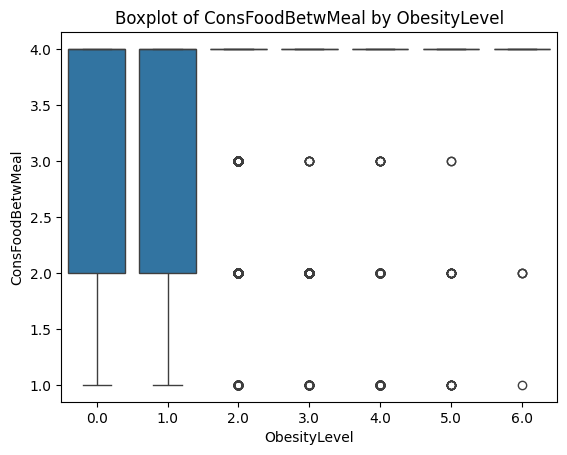

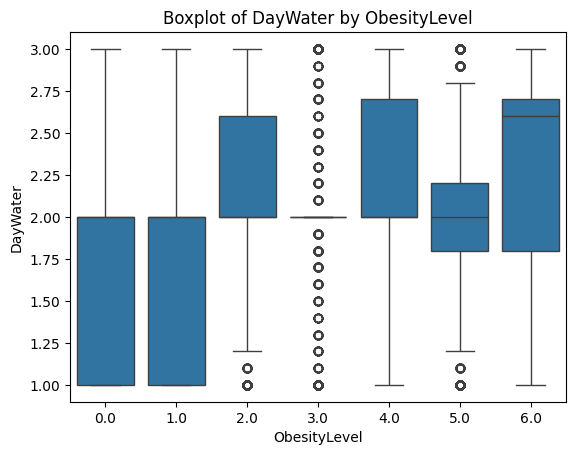

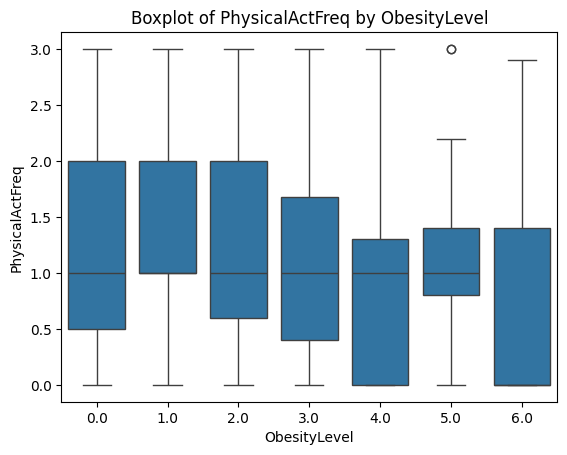

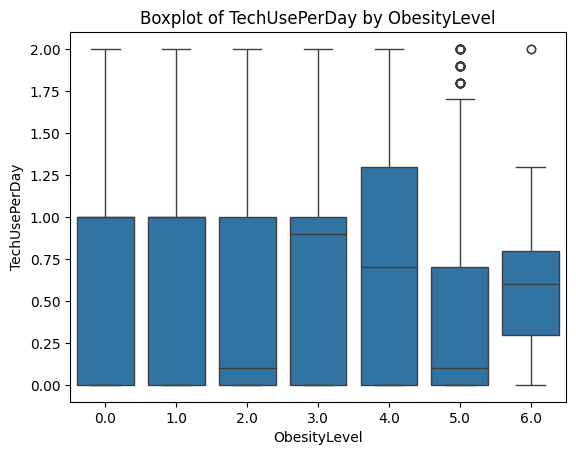

In [51]:
#plotting numerical variables against ObesityLevel
numeric_columns = ['Age', 'Height', 'Weight', 'NumMainMeals', 'ConsFoodBetwMeal', 'DayWater', 'PhysicalActFreq', 'TechUsePerDay']
for col_name in numeric_columns:
    sns.boxplot(x='ObesityLevel', y=col_name, data=df.toPandas())
    plt.xlabel('ObesityLevel')
    plt.ylabel(col_name)
    plt.title(f'Boxplot of {col_name} by ObesityLevel')
    plt.show()


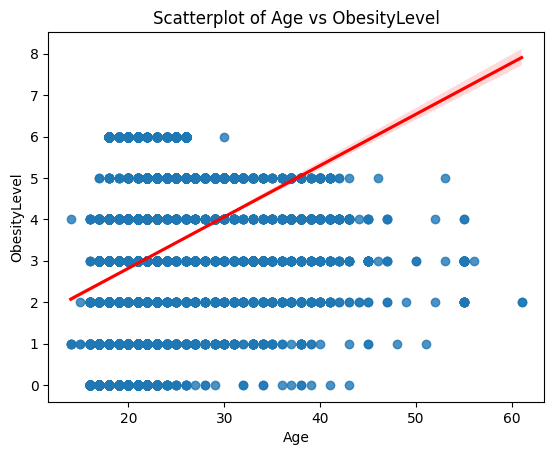

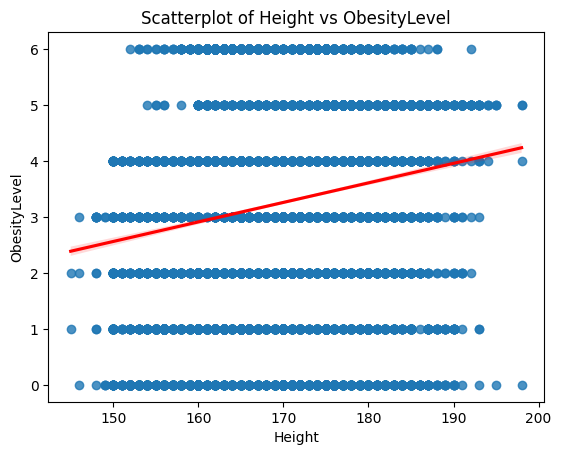

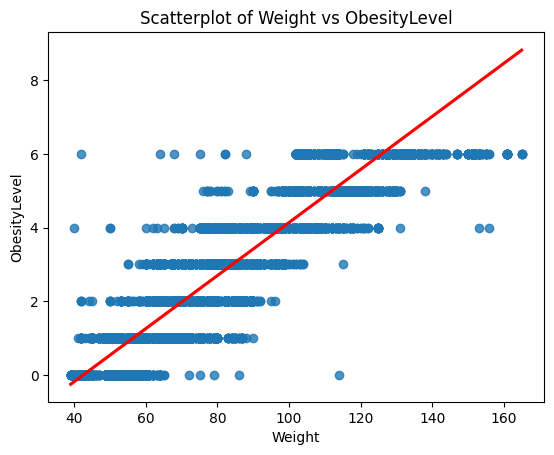

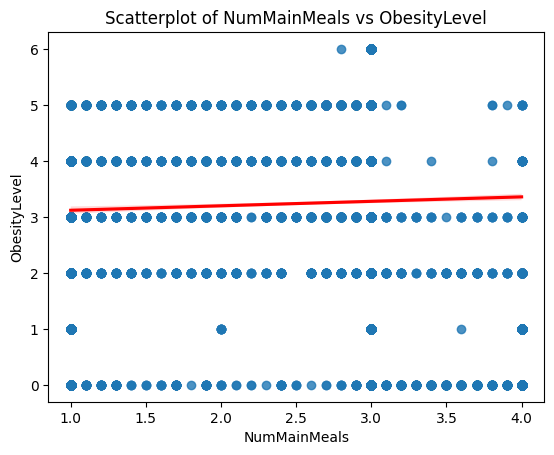

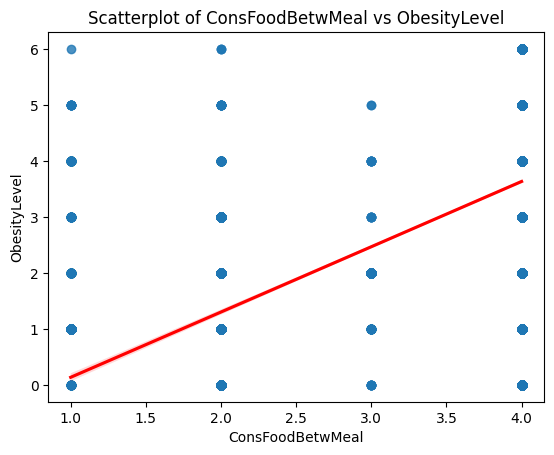

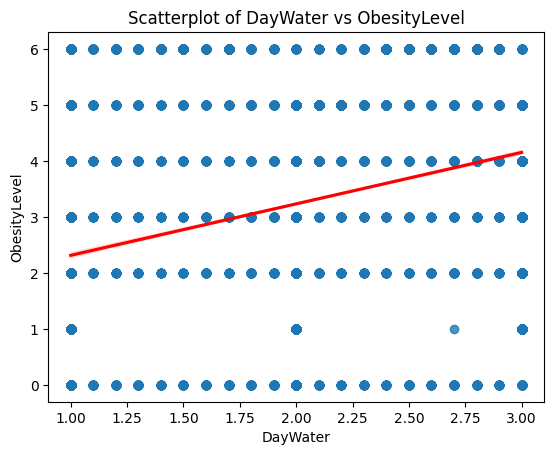

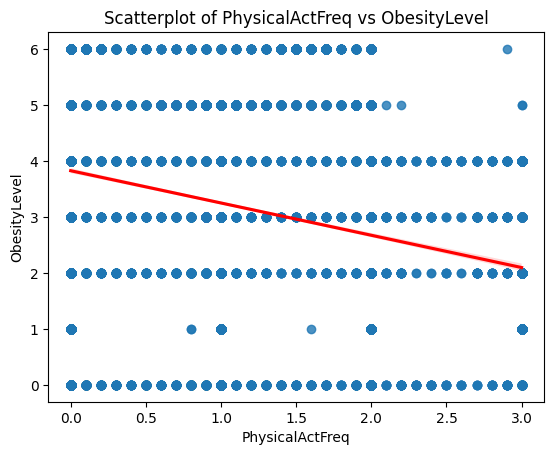

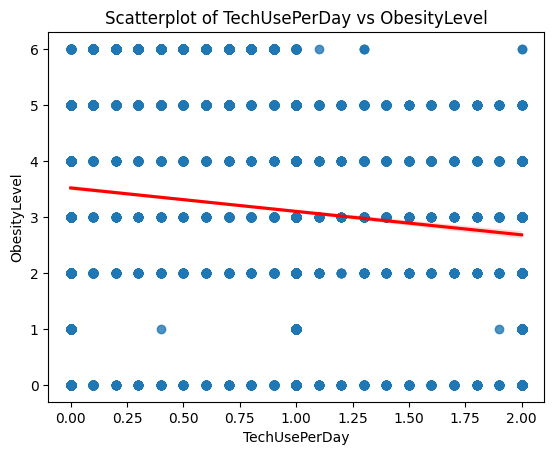

In [22]:
#pandas, seaborn, matplotlib already imported, no need to import
#imporing numpy
import numpy as np

#SCATTERPLOT of target variable with all others
for col_name in numeric_columns:
    sns.regplot(x=col_name, y='ObesityLevel', data=df_pd,
                line_kws={"color": "red"})
    plt.xlabel(col_name)
    plt.ylabel('ObesityLevel')
    plt.title(f'Scatterplot of {col_name} vs ObesityLevel')
    plt.show()



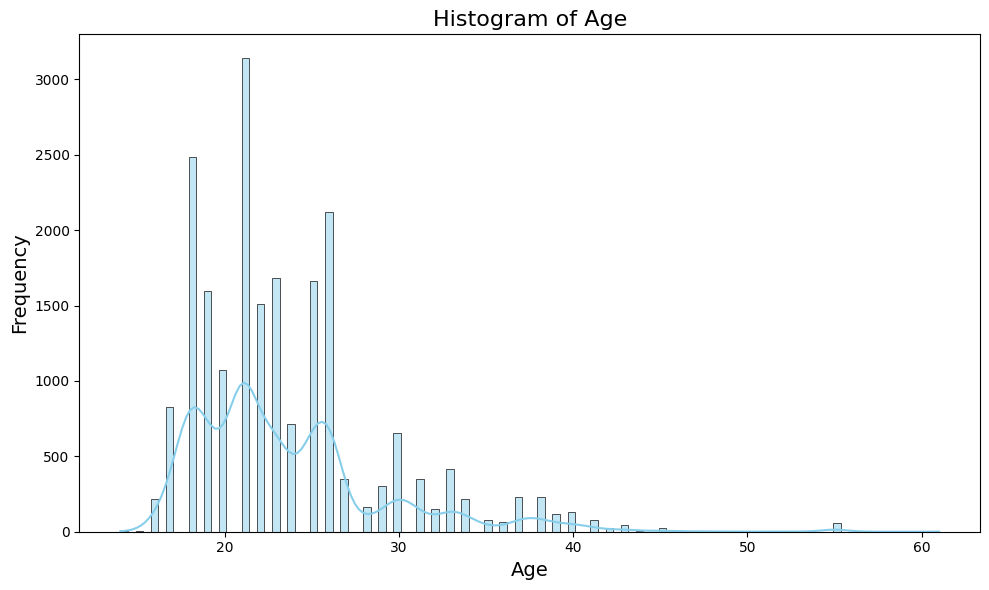

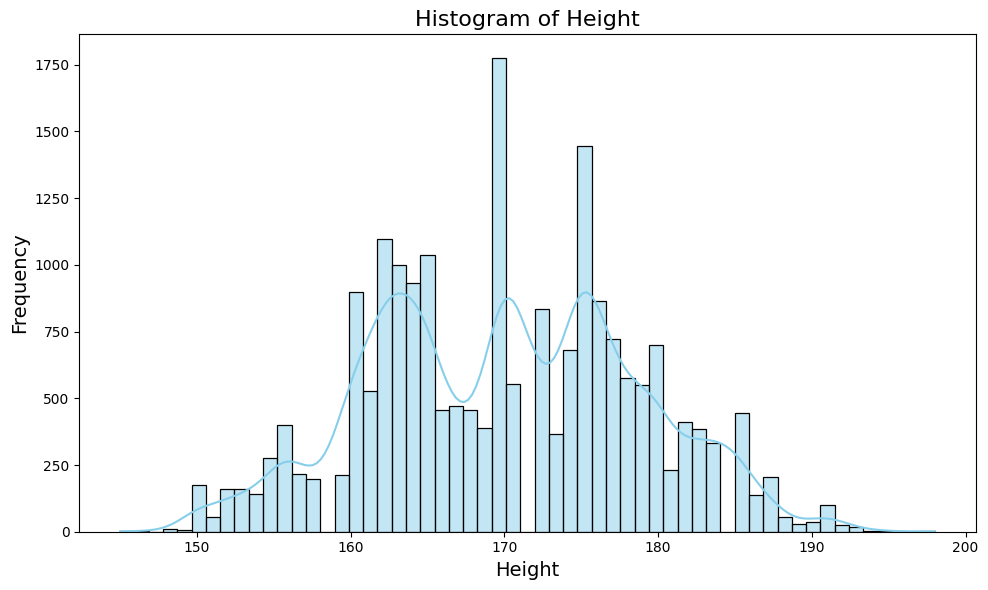

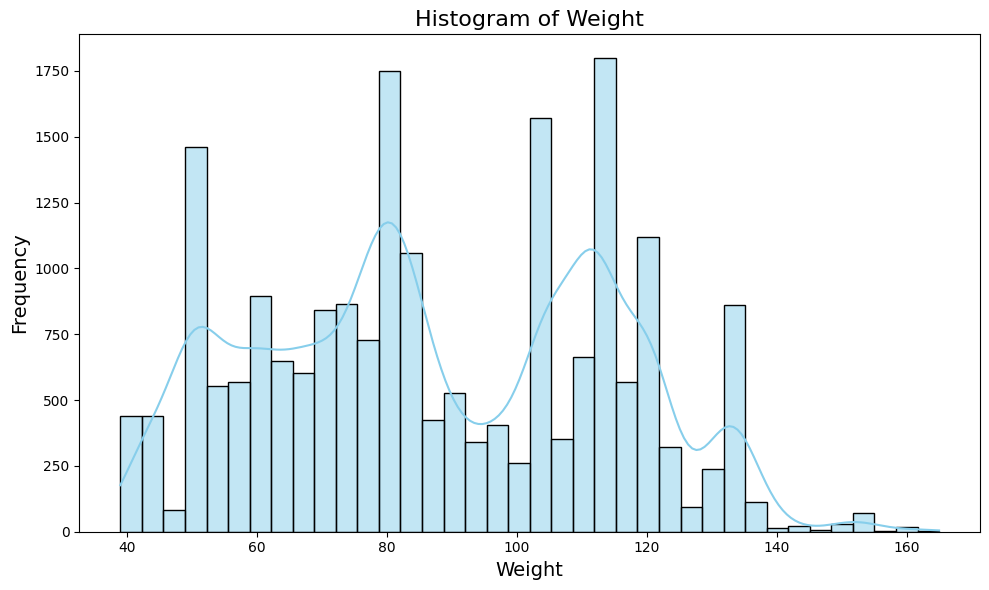

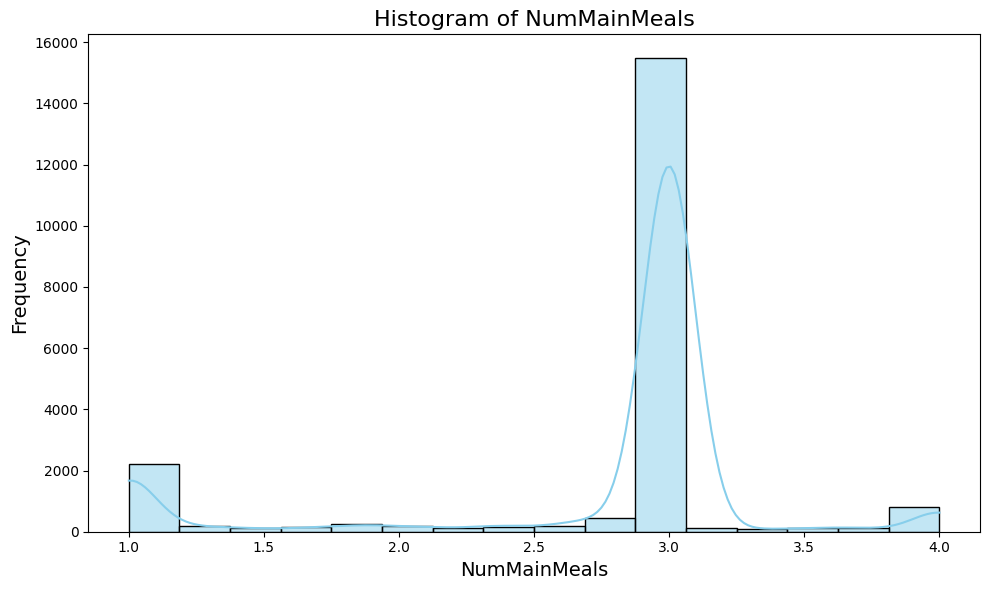

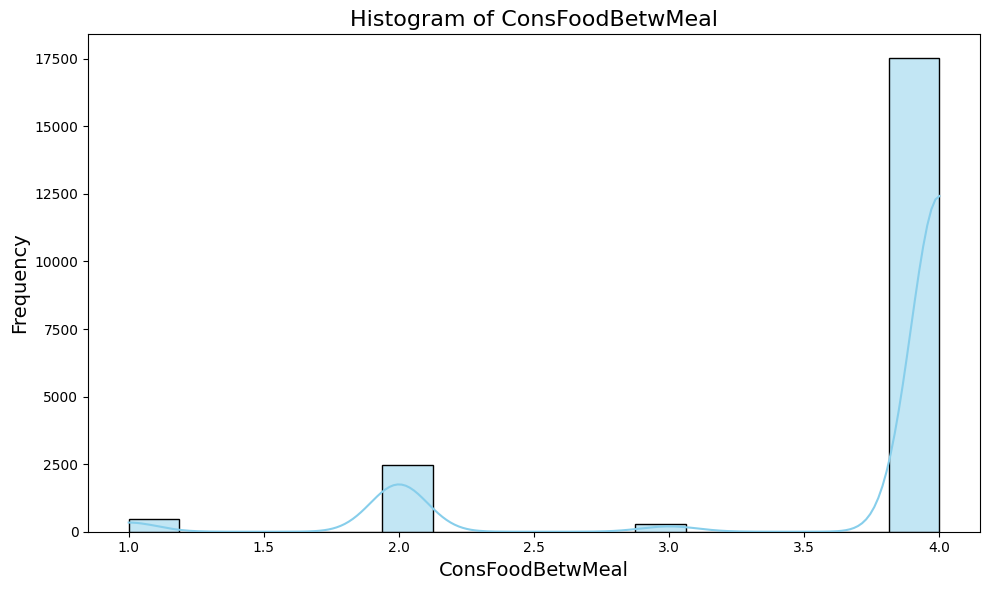

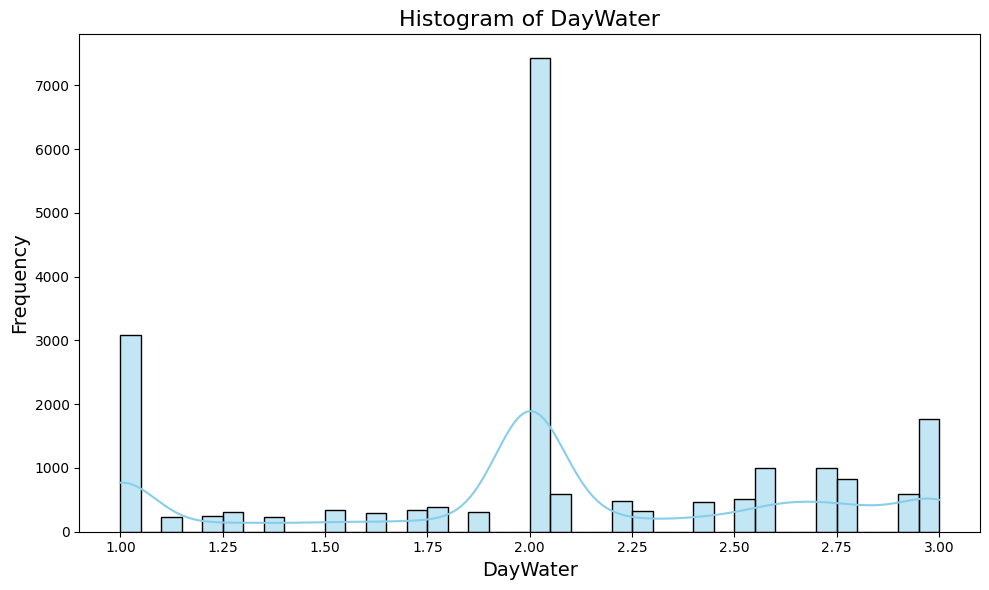

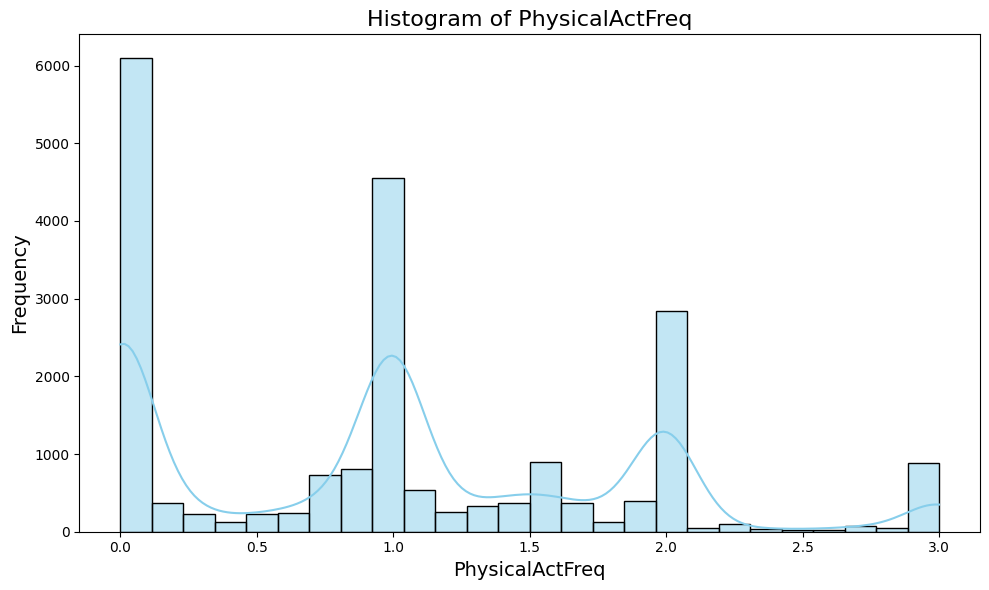

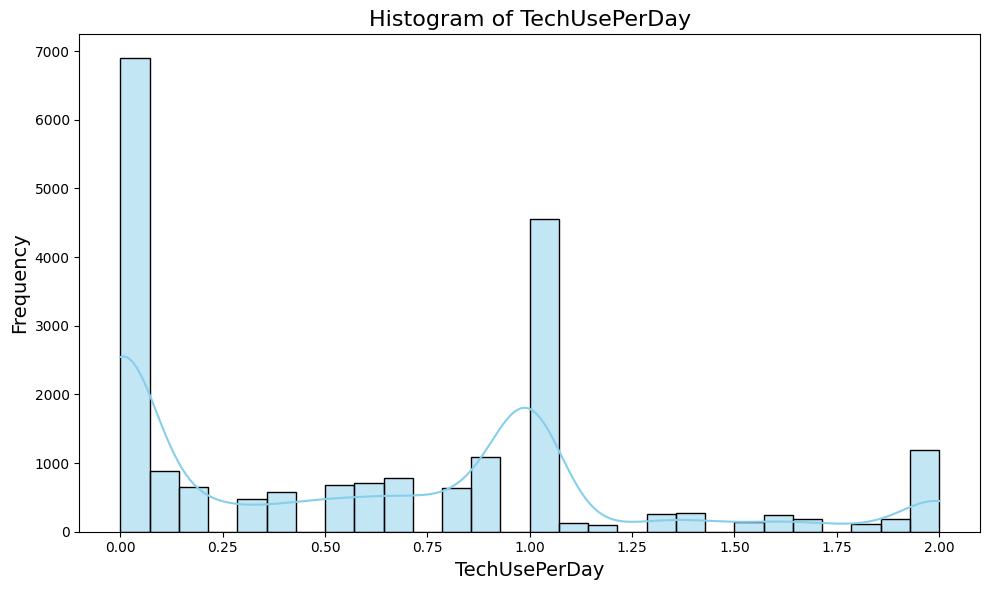

In [23]:
#more visible HISTOGRAMS
for col_name in numeric_columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data=df_pd, x=col_name, kde=True, color='skyblue', edgecolor='black')

    plt.xlabel(col_name, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(f'Histogram of {col_name}', fontsize=16)


    plt.tight_layout()
    plt.show()


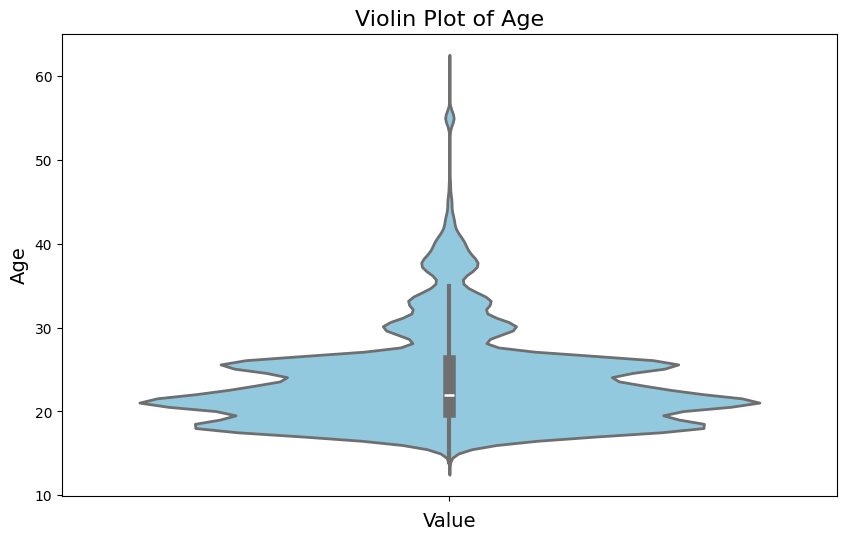

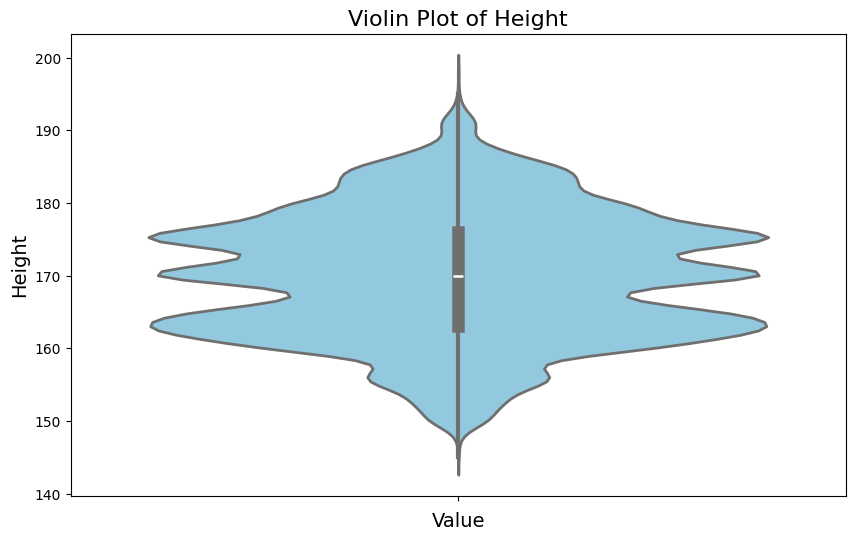

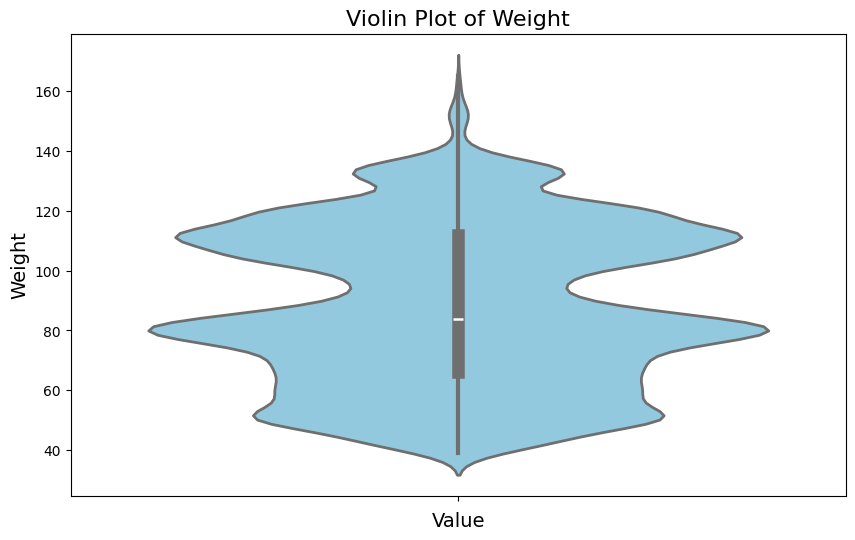

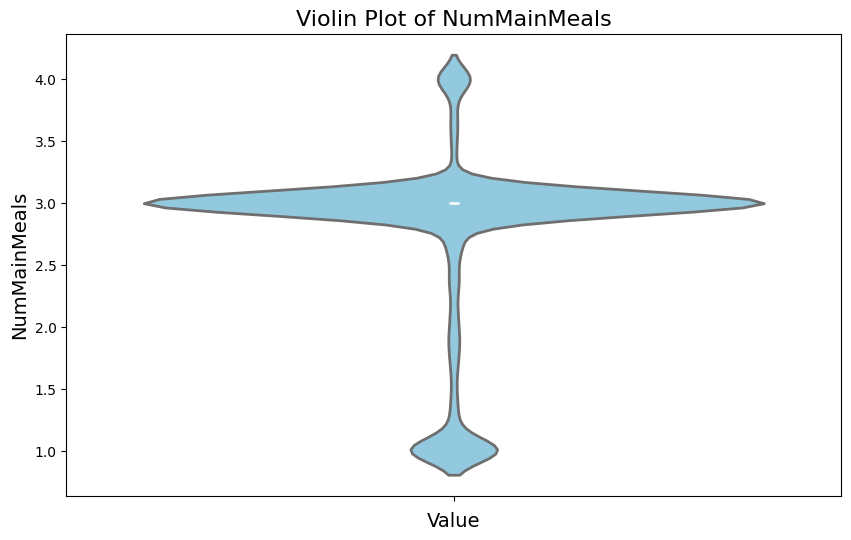

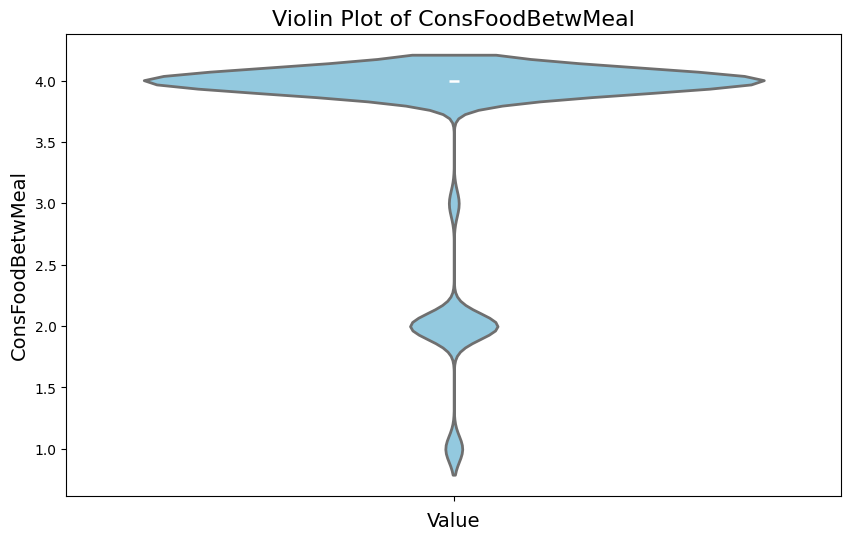

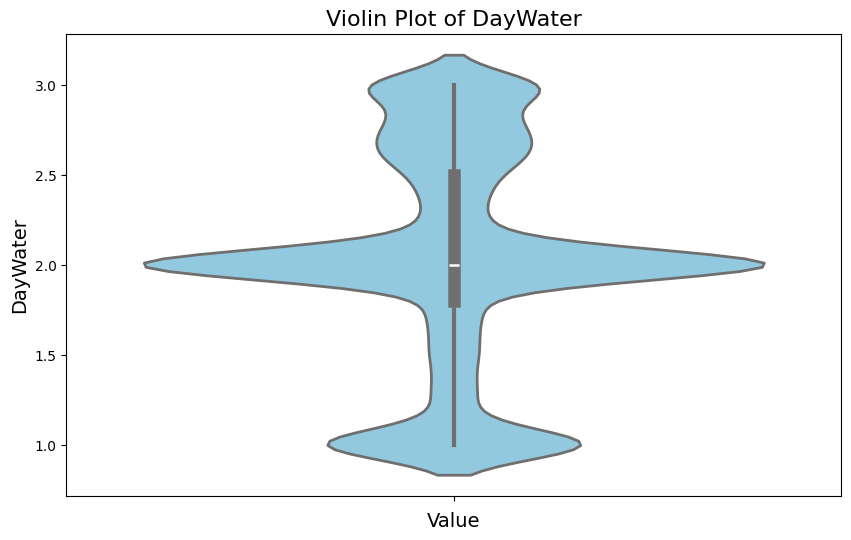

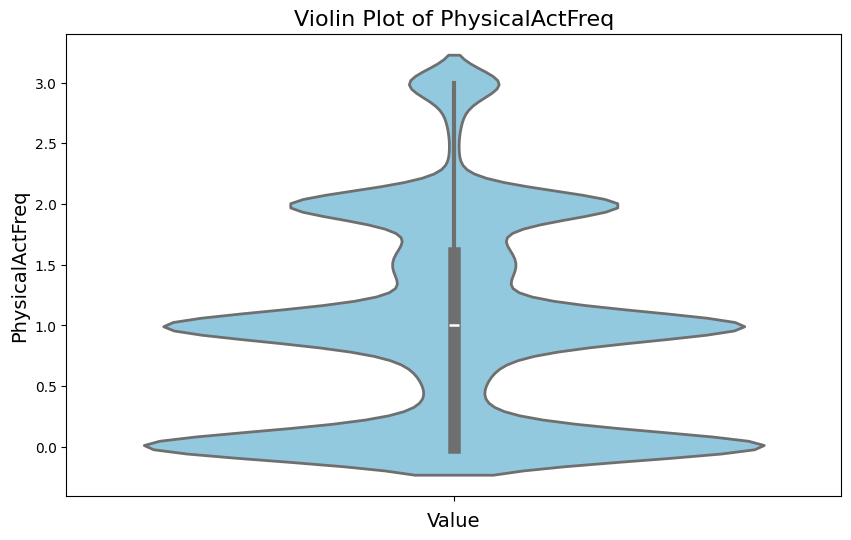

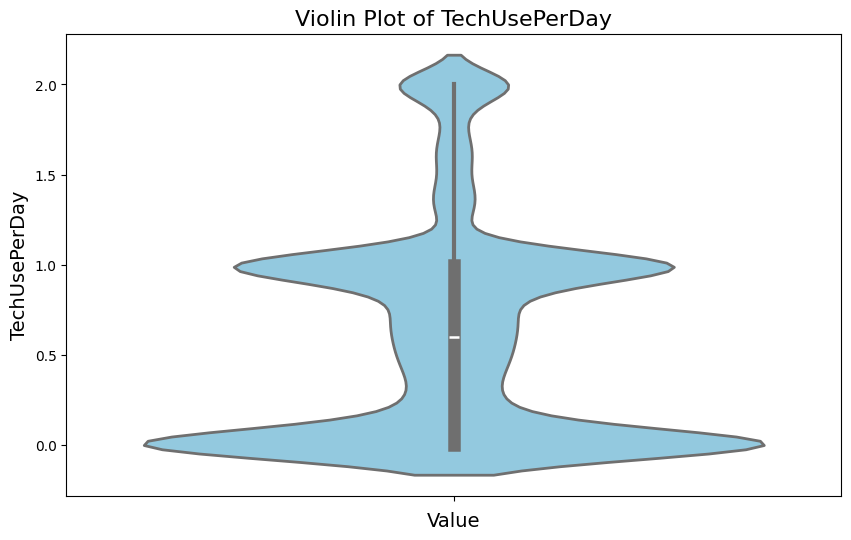

In [24]:
#VIOLIN
for col_name in numeric_columns:

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.violinplot(data=df_pd, y=col_name, color='skyblue', linewidth=2)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel(col_name, fontsize=14)
    plt.title(f'Violin Plot of {col_name}', fontsize=16)
    plt.show()

**QUESTIONS**



In [25]:
### Q1 Is there a difference in obesity prevalence between genders?


from pyspark.sql.functions import col


total_gender = df.groupBy('Gender').count().withColumnRenamed('count', 'TotalCount')
obese_gender = df.filter(col('ObesityLevel') > 0).groupBy('Gender').count().withColumnRenamed('count', 'ObeseCount')
prevalence = total_gender.join(obese_gender, 'Gender', 'left_outer').fillna(0)
obesity_prev = prevalence.withColumn('ObesityPrevalence',
        prevalence['ObeseCount'] / prevalence['TotalCount'])
obesity_prev.show()






#-----------------ANSWER-----------------
#From the output, we can say that Obesity Prevalence is a bit higher for men(1),
#with obese count 9434, but for women(0)is less than men with 8801
#but in total count the number of female is a bit more than male

+------+----------+----------+------------------+
|Gender|TotalCount|ObeseCount| ObesityPrevalence|
+------+----------+----------+------------------+
|   1.0|     10336|      9434|0.9127321981424149|
|   0.0|     10422|      8801| 0.844463634619075|
+------+----------+----------+------------------+



In [26]:
### Q2 Are individuals with higher physical activity levels less likely to be obese?


activ = df.groupBy('PhysicalActFreq').count().withColumnRenamed('count', 'TotalCount')
obese_activ = df.filter(col('ObesityLevel') > 0).groupBy('PhysicalActFreq').count().withColumnRenamed('count', 'ObeseCount')

prev_activ = activ.join(obese_activ, 'PhysicalActFreq', 'left_outer').fillna(0)
prev_activ = prev_activ.withColumn('ObesityPrevalence',
        prev_activ['ObeseCount'] / prev_activ['TotalCount'])

prev_activ.show()






#-----------------ANSWER-----------------
#From the answer my findings are:

#There is variability in obesity prevalence across different levels of physical activity frequency.
#Higher levels of physical activity frequency appears to with lower obesity prevalence.
#For instance, physical activity frequencies of 2.0, 1.5, and 1.6 have relatively high obesity prevalence,
#while frequencies of 2.4, 2.2, and 2.0 have lower obesity prevalence rates.
#There are exceptions, for example physical activity frequencie 3.0, which has very high obesity prevalence.



+---------------+----------+----------+------------------+
|PhysicalActFreq|TotalCount|ObeseCount| ObesityPrevalence|
+---------------+----------+----------+------------------+
|            2.5|        28|        21|              0.75|
|            2.2|        68|        49|0.7205882352941176|
|            2.0|      2842|      2018|0.7100633356790992|
|            1.8|       119|       112|0.9411764705882353|
|            0.1|       539|       455|0.8441558441558441|
|            3.0|       808|       753| 0.931930693069307|
|            2.9|        74|        63|0.8513513513513513|
|            0.6|       239|       219|0.9163179916317992|
|            0.9|       810|       735|0.9074074074074074|
|            1.5|       526|       505|0.9600760456273765|
|            2.6|        22|        16|0.7272727272727273|
|            0.5|       224|       161|           0.71875|
|            1.1|       537|       513|0.9553072625698324|
|            2.8|        49|        41|0.836734693877551

In [27]:
###  Q3 What is the maximum weight for individuals for each obesity level

#importing max from spark sql functions
from pyspark.sql.functions import max
mweight_level = df.groupBy('ObesityLevel').agg(max(col('Weight')).alias('MaxWeight'))

mweight_level.show()


##-----------------ANSWER-----------------
#from asnwer we can see the outlier or error we can say, that level 0: 114kg,
#this is impossible,
#So, this row will be deleted

+------------+---------+
|ObesityLevel|MaxWeight|
+------------+---------+
|         5.0|    138.0|
|         2.0|     96.0|
|         3.0|    115.0|
|         1.0|     90.0|
|         6.0|    165.0|
|         4.0|    156.0|
|         0.0|    114.0|
+------------+---------+



In [28]:
#Finding error row
error_row = df.filter((df['ObesityLevel'] == 0.0) & (df['Weight'] == 114.0))
error_row.show()


+------+------+----+------+------+------------------------------+---------+------------+------------+----------------+-----+--------+-------------+---------------+-------------+-------+------+------------+
|    id|Gender| Age|Height|Weight|family_history_with_overweight|FCHighCal|FCvegetables|NumMainMeals|ConsFoodBetwMeal|SMOKE|DayWater|MonitorCalory|PhysicalActFreq|TechUsePerDay|Alcohol|MTRANS|ObesityLevel|
+------+------+----+------+------+------------------------------+---------+------------+------------+----------------+-----+--------+-------------+---------------+-------------+-------+------+------------+
|8743.0|   1.0|28.0| 176.0| 114.0|                           1.0|      1.0|         1.1|         4.0|             4.0|  0.0|     2.0|          0.0|            2.0|          0.8|    3.0|   1.0|         0.0|
+------+------+----+------+------+------------------------------+---------+------------+------------+----------------+-----+--------+-------------+---------------+-------------

In [29]:
#importing SparkSession
from pyspark.sql import SparkSession

#deleting it
data = df.filter(df['id'] != 8743.0)
data.show()

+----+------+----+------+------+------------------------------+---------+------------+------------+----------------+-----+--------+-------------+---------------+-------------+-------+------+------------+
|  id|Gender| Age|Height|Weight|family_history_with_overweight|FCHighCal|FCvegetables|NumMainMeals|ConsFoodBetwMeal|SMOKE|DayWater|MonitorCalory|PhysicalActFreq|TechUsePerDay|Alcohol|MTRANS|ObesityLevel|
+----+------+----+------+------+------------------------------+---------+------------+------------+----------------+-----+--------+-------------+---------------+-------------+-------+------+------------+
| 1.0|   1.0|24.0| 170.0|  81.0|                           1.0|      1.0|         2.0|         3.0|             4.0|  0.0|     2.8|          0.0|            0.0|          1.0|    3.0|   4.0|         3.0|
| 2.0|   0.0|18.0| 156.0|  57.0|                           1.0|      1.0|         2.0|         3.0|             2.0|  0.0|     2.0|          0.0|            1.0|          1.0|    2.0| 

In [30]:
#Recheck

mweight_level = data.groupBy('ObesityLevel').agg(max(col('Weight')).alias('MaxWeight'))
mweight_level.show()

##-----------------ANSWER-----------------
#Now, answer is sarisfactory
# Level 0: 86kg
# Level 1: 90kg
# Level 2: 96kg
# Level 3: 115kg
# Level 4: 156kg
# Level 5: 138kg
# LEvel 6: 165kg

+------------+---------+
|ObesityLevel|MaxWeight|
+------------+---------+
|         5.0|    138.0|
|         2.0|     96.0|
|         3.0|    115.0|
|         1.0|     90.0|
|         6.0|    165.0|
|         4.0|    156.0|
|         0.0|     86.0|
+------------+---------+



In [31]:
### Q4 Which transportation type is most poular among all ObesityLevels

from pyspark.sql.functions import count, col
from pyspark.sql.window import Window
from pyspark.sql.functions import rank


trans_ol = df.groupBy('MTRANS', 'ObesityLevel').agg(count('*').alias('Count'))

w_spec = Window.partitionBy('ObesityLevel').orderBy(col('Count').desc())

mc_trans = trans_ol.withColumn('rank', rank().over(w_spec)) \
    .filter(col('rank') == 1) \
    .drop('rank') \
    .orderBy('ObesityLevel')

# Display the result
mc_trans.show()




##-----------------ANSWER-----------------
#based on asnwer the most popular transportation type by obesity levels is number 4,
#"Automobile" = 1
#"Bike" = 2
#"Motorbike" = 3
#"Public_Transportation" = 4
#"Walking" = 5))

#Public transportation is most popular among all levels

+------+------------+-----+
|MTRANS|ObesityLevel|Count|
+------+------------+-----+
|   4.0|         0.0| 2166|
|   4.0|         1.0| 2565|
|   4.0|         2.0| 1835|
|   4.0|         3.0| 1649|
|   4.0|         4.0| 2132|
|   4.0|         5.0| 2294|
|   4.0|         6.0| 4046|
+------+------------+-----+



SVM  

Predicting Obesity Levels with using support-vector-machines method

In [52]:
from pyspark.ml.feature import StringIndexer, VectorAssembler, IndexToString, OneHotEncoder
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Index the label column
labelIndexer = StringIndexer(inputCol="ObesityLevel", outputCol="label").fit(df)
categoricalColumns = ["Gender", "family_history_with_overweight", "FCHighCal", "SMOKE", "MonitorCalory", "MTRANS", "Alcohol"]
numericCols = ["Age", "Height", "Weight", "FCvegetables", "NumMainMeals", "ConsFoodBetwMeal", "DayWater", "PhysicalActFreq", "TechUsePerDay"]

encoders = [OneHotEncoder(inputCol=column, outputCol=column+"_Vec") for column in categoricalColumns]

In [54]:
# Assemble all feature columns into a single feature vector
assemblerInputs = [c + "_Vec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

#the base classifier
lr = LogisticRegression(maxIter=10, tol=1E-6, fitIntercept=True)

#OneVsRest with the base classifier
ovr = OneVsRest(classifier=lr)
pipeline = Pipeline(stages=[labelIndexer] + encoders + [assembler, ovr])

# Splitting the data into training and test
(trainingData, testData) = df.randomSplit([0.8, 0.2])

model = pipeline.fit(trainingData)

In [55]:
#predictions
predictions = model.transform(testData)

#display
predictions.select("prediction", "label", "features").show(5)

# Evaluation
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

# Compute the accuracy on the test set
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))


#---------------------------------------------OUTPUT
#From the output it is visible that accuracy is about 0.75, but ML part using R same method
#the accuray is about 0.85

#The reason is OneVsREst and Logistic regression method used for classifier,
#logistic is for binary and onevsresr is for multiclass.


#Below others methods are applied to see the difference

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(22,[0,3,4,9,13,1...|
|       3.0|  5.0|(22,[3,4,9,12,13,...|
|       3.0|  3.0|(22,[0,3,4,6,13,1...|
|       5.0|  3.0|(22,[2,3,4,9,12,1...|
|       0.0|  0.0|(22,[0,3,4,9,13,1...|
+----------+-----+--------------------+
only showing top 5 rows

Test set accuracy = 0.7498195814289151


In [56]:
#Here chaged technique and used LinearSVC with OneVsRest
from pyspark.ml.classification import LinearSVC, OneVsRest


#base classifier with LinearSVC
lsvc = LinearSVC(maxIter=10, regParam=0.1)

# OneVsRest withclassifier
ovr = OneVsRest(classifier=lsvc)

# Define the pipeline
pipeline = Pipeline(stages=[labelIndexer] + encoders + [assembler, ovr])

(trainingData, testData) = df.randomSplit([0.8, 0.2])
model = pipeline.fit(trainingData)

# predictions
predictions = model.transform(testData)

# display
predictions.select("prediction", "label", "features").show(5)

# Evaluation
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

# Compute the accuracy
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))




#---------------------------------------------OUTPUT
#The situation worsened, and now it is 0.62

#Other techniques below

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       1.0|  5.0|(22,[3,4,9,13,14,...|
|       1.0|  1.0|(22,[3,4,6,13,14,...|
|       4.0|  6.0|(22,[1,3,9,12,13,...|
|       4.0|  2.0|[1.0,1.0,1.0,1.0,...|
|       1.0|  1.0|(22,[3,4,9,13,14,...|
+----------+-----+--------------------+
only showing top 5 rows

Test set accuracy = 0.6425438596491229


BMI

In [58]:
from pyspark.sql.functions import col

# Assuming 'data' is your Spark DataFrame

# Add a new column 'BMI' to the DataFrame
data_with_bmi = df.withColumn("BMI", col("Weight") / ((col("Height") / 100) ** 2))

# Show the first few rows to confirm the addition of the BMI column
data_with_bmi.select("Height", "Weight", "BMI").show(5)



+------+------+------------------+
|Height|Weight|               BMI|
+------+------+------------------+
| 170.0|  81.0|28.027681660899656|
| 156.0|  57.0|23.422090729783037|
| 171.0|  50.0| 17.09927841045108|
| 171.0| 131.0|44.800109435381835|
| 191.0|  93.0|25.492722238973712|
+------+------+------------------+
only showing top 5 rows



SVM with BMI

In [59]:
from pyspark.ml.feature import StringIndexer, VectorAssembler, IndexToString, OneHotEncoder
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


labelIndexer = StringIndexer(inputCol="ObesityLevel", outputCol="label").fit(data_with_bmi)

#numerical columns including  'BMI'
numericCols = ["Age", "Height", "Weight", "FCvegetables", "NumMainMeals", "ConsFoodBetwMeal", "DayWater", "PhysicalActFreq", "TechUsePerDay", "BMI"]
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")

#base classifier
lr = LogisticRegression(maxIter=10, tol=1E-6, fitIntercept=True)

In [60]:
# OneVsRest with the base classifier
ovr = OneVsRest(classifier=lr)

# pipeline
pipeline = Pipeline(stages=[labelIndexer, assembler, ovr])

# Split the data
(trainingData, testData) = data_with_bmi.randomSplit([0.8, 0.2])

# Train
model = pipeline.fit(trainingData)


In [62]:
#predictions
predictions = model.transform(testData)
predictions.select("prediction", "label", "features").show(5)

# Evaluation
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))





#---------------------------------------------OUTPUT
#The accuracy is better with BMI and logistic vs onerest, but less than without BMI
#shows 0.71

#Below other method

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       4.0|  4.0|[18.0,171.0,50.0,...|
|       2.0|  6.0|[20.0,165.0,65.0,...|
|       4.0|  2.0|[20.0,157.0,49.0,...|
|       3.0|  5.0|[22.0,170.0,80.0,...|
|       3.0|  5.0|[23.0,155.0,80.0,...|
+----------+-----+--------------------+
only showing top 5 rows

Test set accuracy = 0.7166666666666667


.

.

.

.

**ChiSqSelector for modelling**

In [110]:
from pyspark.ml.feature import ChiSqSelector

# Initialize and configure the ChiSqSelector
selector = ChiSqSelector(numTopFeatures=10, featuresCol="features", outputCol="selectedFeatures", labelCol="indexedLabel")

# Fit and transform to select features
model = selector.fit(df)
df_selected = model.transform(df)

# Display the result with selected features
df_selected.show()


#---------------------------------OUTPUT
#want to select the top 10 features that have the most significant
#relationship with the target variable based on the Chi-Squared test
#featuresCol="features"
#outputCol="selectedFeatures"
#labelCol="indexedLabel"

+----+------+----+------+------+------------------------------+---------+------------+------------+----------------+-----+--------+-------------+---------------+-------------+-------+------+------------+--------------------+------------+--------------------+
|  id|Gender| Age|Height|Weight|family_history_with_overweight|FCHighCal|FCvegetables|NumMainMeals|ConsFoodBetwMeal|SMOKE|DayWater|MonitorCalory|PhysicalActFreq|TechUsePerDay|Alcohol|MTRANS|ObesityLevel|            features|indexedLabel|    selectedFeatures|
+----+------+----+------+------+------------------------------+---------+------------+------------+----------------+-----+--------+-------------+---------------+-------------+-------+------+------------+--------------------+------------+--------------------+
| 1.0|   1.0|24.0| 170.0|  81.0|                           1.0|      1.0|         2.0|         3.0|             4.0|  0.0|     2.8|          0.0|            0.0|          1.0|    3.0|   4.0|           3|[1.0,24.0,170.0,8...

ML.Classification Logostic regression, is speccially designed for classification

In [113]:
#Training
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol="selectedFeatures", labelCol="indexedLabel", maxIter=10)
model = lr.fit(df_selected)

In [114]:
# Split
(train_df, test_df) = df.randomSplit([0.8, 0.2], seed=1234)

# Initialize
lr = LogisticRegression(featuresCol="features", labelCol="indexedLabel", maxIter=10, family='multinomial')  # Adjust family parameter as needed

# Fit
lr_model = lr.fit(train_df)


In [115]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#prediction
predictions = lr_model.transform(test_df)

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))






#---------------------------------OUTPUT
#    0.80 best result
#    With overall 4 method using SVM, the last method logistic regression for
#    classification which is specifically  designed for classification shows best
#    best result with ChSqSeelctor test


Test set accuracy = 0.8004825090470447
